<a href="https://colab.research.google.com/github/mehmetgul/neural-nets-and-deep-learning/blob/main/Part_2_Weather_prediction_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import random

In [19]:
datafile = "cleaned_data/weather_data.csv"

In [20]:

def get_data(filename):
    df = pd.read_csv(filename)
    X_ = df[["Humidity","Visibility (km)"]]
    Y_ = df[["Temperature (C)"]]

    # Spliting data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_, Y_, test_size=0.25, random_state=42)



    return X_train, X_test, y_train, y_test



In [21]:
X_train, X_test, y_train, y_test = get_data(datafile)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(72321, 2) (24108, 2) (72321, 1) (24108, 1)


**1. Data Iterator (data_iter function)**

Purpose: Create batches of data for mini-batch gradient descent


In [22]:
def data_iter(batch_size, X, y):
    num_examples = len(X)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
         batch_indices = indices[i:min(i + batch_size, num_examples)]
         yield X.iloc[batch_indices].values, y.iloc[batch_indices].values


In [23]:
batch_size = 32 #or 64

for X, y in data_iter(batch_size, X_train, y_train):
    print(X, '\n', y)
    break

[[0.74  0.941]
 [0.4   0.643]
 [0.75  0.623]
 [0.71  0.921]
 [0.97  0.409]
 [0.79  0.983]
 [0.93  0.164]
 [0.93  0.25 ]
 [0.63  0.941]
 [0.86  1.   ]
 [0.5   0.62 ]
 [0.93  0.307]
 [0.96  0.391]
 [0.92  0.926]
 [0.9   0.676]
 [0.78  0.983]
 [0.92  0.254]
 [0.47  0.643]
 [0.72  0.983]
 [0.9   0.5  ]
 [0.59  0.62 ]
 [0.75  0.983]
 [0.34  0.696]
 [0.26  0.644]
 [0.96  0.61 ]
 [0.85  0.906]
 [0.92  0.272]
 [0.54  1.   ]
 [0.78  0.983]
 [0.33  0.62 ]
 [0.94  0.62 ]
 [0.8   1.   ]] 
 [[0.67914837]
 [0.85527297]
 [0.67566896]
 [0.67185817]
 [0.50028995]
 [0.4833071 ]
 [0.6690415 ]
 [0.65354983]
 [0.51710712]
 [0.57799685]
 [0.72670036]
 [0.48653798]
 [0.51172231]
 [0.65984591]
 [0.60342971]
 [0.60351255]
 [0.33476928]
 [0.76489106]
 [0.32888742]
 [0.62041256]
 [0.80374451]
 [0.30743103]
 [0.8142656 ]
 [0.83621904]
 [0.60690912]
 [0.48587524]
 [0.29591583]
 [0.74467733]
 [0.28116975]
 [0.74426311]
 [0.58520421]
 [0.57766548]]


## create and initialize model parameter

**2. Model Parameters (create_model_parameter)**

Purpose: Initialize weights and bias

In [24]:

def create_model_parameter(mu, sigma, row, column):
    w = np.random.normal(mu, sigma, size=(row, column))
    b = np.zeros((1, column))
    return w,b

**3. Linear Model (model function)**

Purpose: Compute predictions: ŷ = X·w + b

In [25]:
def model(X, w, b):
    """The linear regression model."""
    # write your code here
    return np.dot(X, w) + b

**4. Loss Function (squared_loss)**

Purpose: Calculate Mean Squared Error

In [26]:
def squared_loss(y_hat, y):
    """Squared loss."""
    return ((y_hat - y) ** 2) / 2


**5. Gradient Computation (gradient)**

Purpose: Calculate gradients for backpropagation

In [27]:
def gradient(X,y,y_hat):
    #compute gradeint of loss function with respect to params
    batch_size = len(X)
    dw = np.dot(X.T, (y_hat - y)) / batch_size
    db = np.sum(y_hat - y, axis=0, keepdims=True) / batch_size
    return dw, db


**6. SGD Optimizer (sgd function)**

Purpose: Update parameters using gradient descent

In [28]:
def sgd(params, grads, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    w, b = params
    dw, db = grads

    w -= lr * dw
    b -= lr * db

    return w, b

**7. Training Loop (train function)**

Purpose: Train the model over multiple epochs

In [29]:
def train(lr, num_epochs, X, y, batch_size):
    # Initialize parameters
    w, b = create_model_parameter(0, 0.01, 2, 1)  # 2 features, 1 output

    losses = []

    for epoch in range(num_epochs):
        epoch_loss = 0
        num_batches = 0

        for X_batch, y_batch in data_iter(batch_size, X, y):
            # Forward pass
            y_hat = model(X_batch, w, b)

            # Compute loss
            loss = squared_loss(y_hat, y_batch)
            epoch_loss += np.mean(loss)
            num_batches += 1

            # Compute gradients
            dw, db = gradient(X_batch, y_batch, y_hat)

            # Update parameters
            w, b = sgd((w, b), (dw, db), lr, batch_size)

        avg_loss = epoch_loss / num_batches
        losses.append(avg_loss)

        if (epoch + 1) % 10 == 0:
            print(f'epoch {epoch + 1}, loss {avg_loss:.6f}')

    return w, b, losses

**8. Visualization (draw_loss)**

Purpose: Plot the loss curve

In [30]:
def draw_loss(losses):
    import matplotlib.pyplot as plt
    plt.plot(range(1, len(losses) + 1), losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Time')
    plt.grid(True)
    plt.show()

epoch 10, loss 0.007725
epoch 20, loss 0.007709
epoch 30, loss 0.007730
epoch 40, loss 0.007707
epoch 50, loss 0.007710
epoch 60, loss 0.007721
epoch 70, loss 0.007712
epoch 80, loss 0.007707
epoch 90, loss 0.007708
epoch 100, loss 0.007708


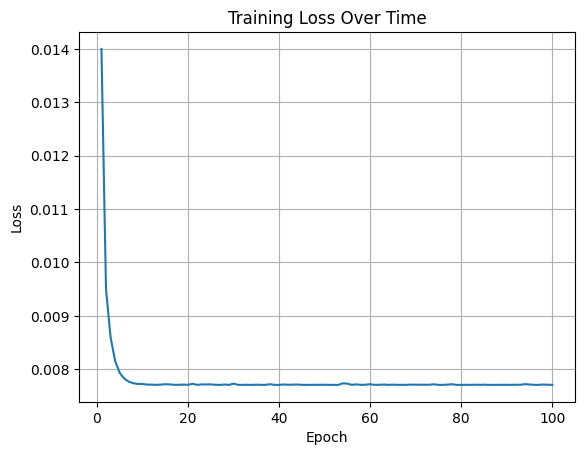

In [31]:
lr = 0.01
num_epochs = 100
batch_size = 32

# After training
w, b, losses = train(lr, num_epochs, X_train, y_train, batch_size)

# Optional: Visualize the loss curve
draw_loss(losses)

**9. Testing (test function)**

Purpose: Make predictions on new data

In [32]:
def test(X, w, b):
    """Predict temperature with the given humidity and visibility"""
    predictions = model(X.values, w, b)
    return predictions

In [33]:
test_predictions = test(X_test, w, b)
test_loss = np.mean(squared_loss(test_predictions, y_test.values))
print(f'Test Loss: {test_loss:.6f}')

Test Loss: 0.007780


 **Adding Batch Size Comparison (15 points)**

Training with different batch sizes...

Training with batch_size = 8...
epoch 10, loss 0.007717
epoch 20, loss 0.007718
epoch 30, loss 0.007717
epoch 40, loss 0.007717
epoch 50, loss 0.007719
epoch 60, loss 0.007717
epoch 70, loss 0.007718
epoch 80, loss 0.007721
epoch 90, loss 0.007719
epoch 100, loss 0.007719
Final loss: 0.007719

Training with batch_size = 32...
epoch 10, loss 0.007715
epoch 20, loss 0.007707
epoch 30, loss 0.007714
epoch 40, loss 0.007710
epoch 50, loss 0.007714
epoch 60, loss 0.007712
epoch 70, loss 0.007719
epoch 80, loss 0.007707
epoch 90, loss 0.007710
epoch 100, loss 0.007718
Final loss: 0.007718

Training with batch_size = 128...
epoch 10, loss 0.008681
epoch 20, loss 0.007879
epoch 30, loss 0.007736
epoch 40, loss 0.007740
epoch 50, loss 0.007767
epoch 60, loss 0.007696
epoch 70, loss 0.007699
epoch 80, loss 0.007719
epoch 90, loss 0.007709
epoch 100, loss 0.007701
Final loss: 0.007701


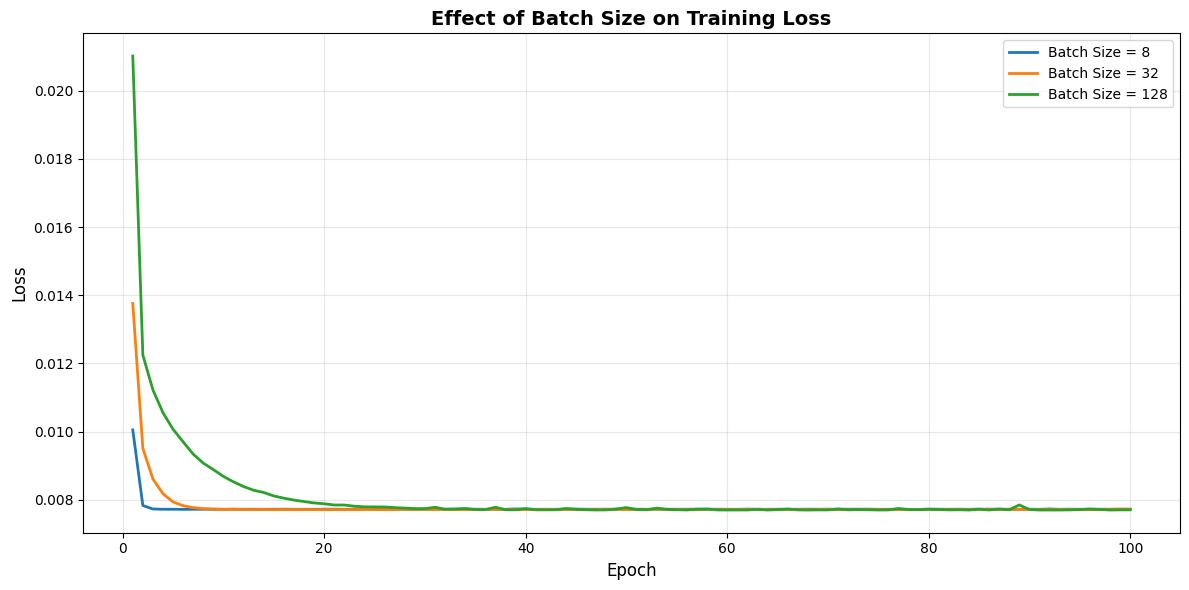

In [34]:
# Train with using different batch sizes
print("Training with different batch sizes...")
batch_sizes = [8, 32, 128]
all_losses = {}

for bs in batch_sizes:
    print(f"\nTraining with batch_size = {bs}...")
    w, b, losses = train(lr=0.01, num_epochs=100, X=X_train, y=y_train, batch_size=bs)
    all_losses[bs] = losses
    print(f"Final loss: {losses[-1]:.6f}")

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for bs in batch_sizes:
    plt.plot(range(1, 101), all_losses[bs], label=f'Batch Size = {bs}', linewidth=2)

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Effect of Batch Size on Training Loss', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
